In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [24]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 *
city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

SyntaxError: invalid syntax (<ipython-input-24-7e82c3391761>, line 2)

/Users/galmomani14/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


ValueError: 'label' must be of length 'x'

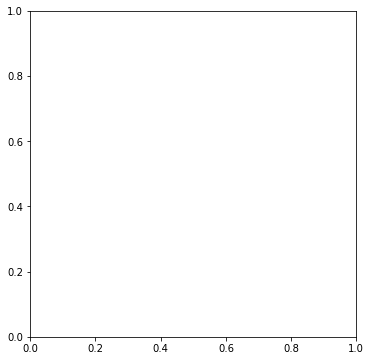

In [23]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()